In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato.csv")
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.shape

(51717, 17)

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [10]:
for feature in feature_na:
    print(' {} has {} missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

 rate has 15.0337 missing values
 phone has 2.3358 missing values
 location has 0.0406 missing values
 rest_type has 0.4389 missing values
 dish_liked has 54.2916 missing values
 cuisines has 0.087 missing values
 approx_cost(for two people) has 0.669 missing values


In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [14]:
df.shape

(43942, 17)

In [15]:
def split(x):
    return x.split('/')[0]

In [16]:
df['rate']= df['rate'].apply(split)

In [17]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [18]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [20]:
df.replace('NEW',0,inplace=True)

In [21]:
df.replace('-',0,inplace=True)

In [22]:
df['rate'].dtype

dtype('O')

In [23]:
df['rate']=df['rate'].astype(float)

In [24]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [28]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns=['restaurant','avg_rating']
df_rate.head()

restaurant  avg_rating
0                          #FeelTheROLL         3.4
1                            #L-81 Cafe         3.9
2                               #refuel         3.7
3                              1000 B.C         3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         3.7

D:\APPS-FILES\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_rating', ylabel='Density'>

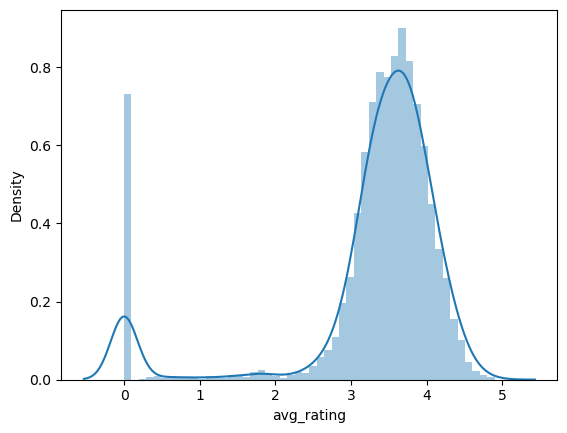

In [30]:
sns.distplot(df_rate['avg_rating'])

In [32]:
df_rate.shape

(7162, 2)

Text(0.5, 0, 'Number of outlets')

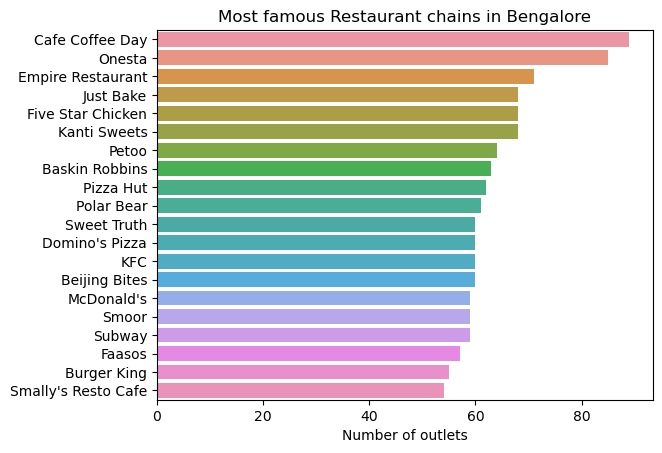

In [36]:
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index)
plt.title('Most famous Restaurant chains in Bengalore')
plt.xlabel('Number of outlets')

In [44]:
x =df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [43]:
import plotly.express as px

In [45]:
labels=['accepted','Not accepted']

In [52]:
px.pie(df,values=x,labels=labels,title='Pie Chart')

In [61]:
x=df['book_table'].value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

In [62]:
labels =['not book','book']

In [63]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [68]:
trace=go.Pie(labels=labels,values=x,hoverinfo='label+percent',textinfo='value')
iplot([trace])

In [83]:
df['rest_type'].isna().sum()

151

In [125]:
df['rest_type'].dropna(inplace=True)

In [126]:
df['rest_type'].isna().sum()

149

In [127]:
len(df['rest_type'].unique())

88

In [92]:
trace1=go.Bar(x=df['rest_type'].value_counts().nlargest(20).index,
      y=df['rest_type'].value_counts().nlargest(20)
)
iplot([trace1])

<AxesSubplot:xlabel='name'>

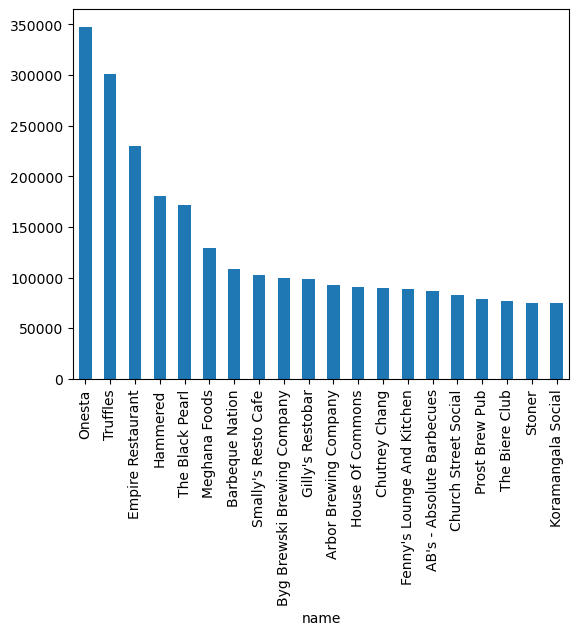

In [93]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()

In [94]:
trace2=go.Bar(x=df.groupby('name')['votes'].sum().nlargest(20).index,
      y=df.groupby('name')['votes'].sum().nlargest(20))
iplot([trace2])

In [108]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [109]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.head()

location  restaurant
0                BTM         581
1       Banashankari         238
2          Banaswadi         151
3  Bannerghatta Road         362
4       Basavanagudi         195

In [110]:
df_total.set_index('location',inplace=True)
df_total.head()

restaurant
location                     
BTM                       581
Banashankari              238
Banaswadi                 151
Bannerghatta Road         362
Basavanagudi              195

<AxesSubplot:xlabel='location'>

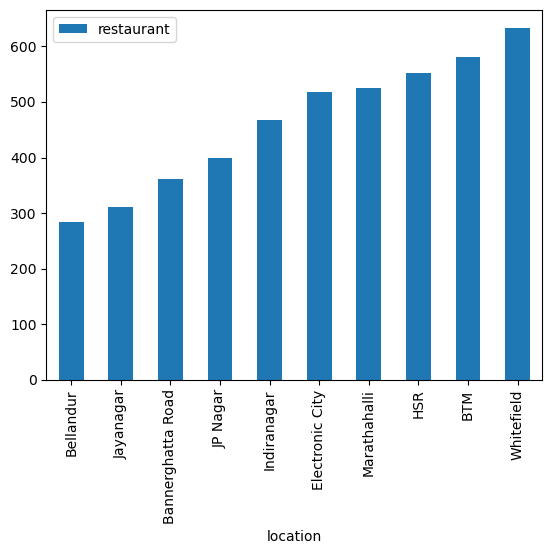

In [112]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

In [113]:
cuisines=df['cuisines'].value_counts()[0:10]
cuisines

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [115]:
trace3=go.Bar(
x=df['cuisines'].value_counts()[0:10].index,
y=df['cuisines'].value_counts()[0:10])

In [116]:
iplot([trace3])

In [117]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [118]:
df['approx_cost(for two people)'].isna().sum()

252

In [119]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [120]:
df['approx_cost(for two people)'].isna().sum()

0

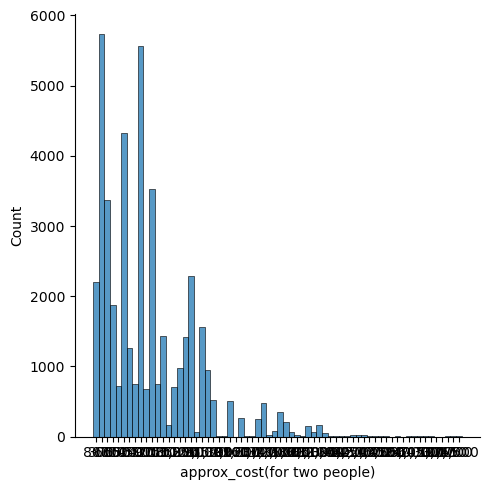

In [129]:
sns.displot(df['approx_cost(for two people)'])

In [130]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [131]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [133]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [134]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [135]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [136]:
df['approx_cost(for two people)'].dtype

dtype('int32')

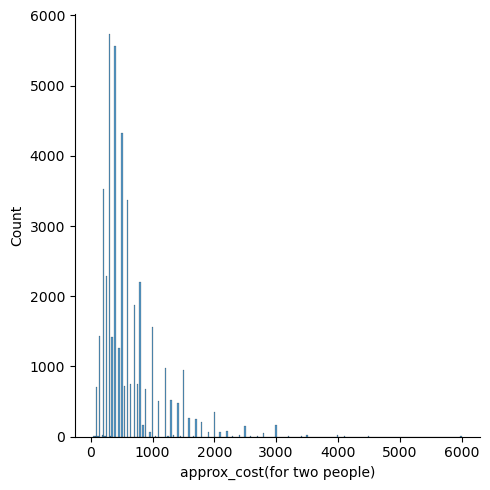

In [137]:
sns.displot(df['approx_cost(for two people)'])

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

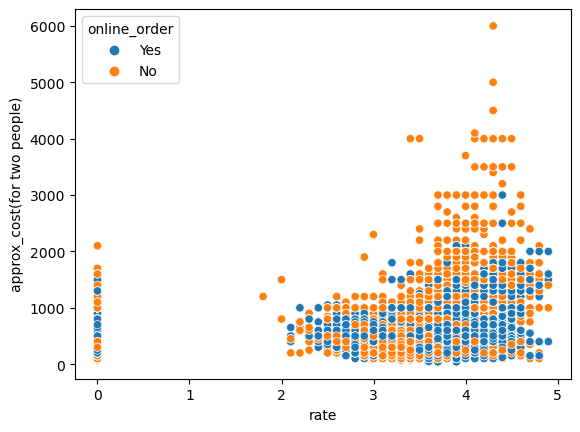

In [138]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',hue='online_order',data=df)

<AxesSubplot:xlabel='online_order', ylabel='votes'>

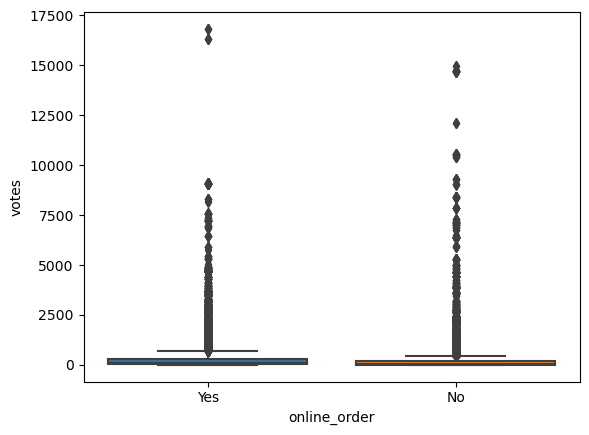

In [139]:
sns.boxplot(x='online_order',y='votes',data=df)

In [142]:
px.box(df,x='online_order',y='votes')

In [143]:
px.box(df,x='online_order',y='approx_cost(for two people)')

In [144]:
df['approx_cost(for two people)'].min()

40

In [145]:
df['approx_cost(for two people)'].max()

6000

In [148]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [149]:
data =df.copy()

In [150]:
data.set_index('name',inplace=True)

In [151]:
data.head()

url  \
name                                                                       
Jalsa                  https://www.zomato.com/bangalore/jalsa-banasha...   
Spice Elephant         https://www.zomato.com/bangalore/spice-elephan...   
San Churro Cafe        https://www.zomato.com/SanchurroBangalore?cont...   
Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
Grand Village          https://www.zomato.com/bangalore/grand-village...   

                                                                 address  \
name                                                                       
Jalsa                  942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant         2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe        1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village          10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                      online_order book_table  rate  votes  \
name                                                         
Jalsa                          Yes        Yes   4.1    775   
Spice Elephant                 Yes         No   4.1    787   
San Churro Cafe                Yes         No   3.8    918   
Addhuri Udupi Bhojana           No         No   3.7     88   
Grand Village                   No         No   3.8    166   

                                                  phone      location  \
name                                                                    
Jalsa                    080 42297555\r\n+91 9743772233  Banashankari   
Spice Elephant                             080 41714161  Banashankari   
San Churro Cafe                          +91 9663487993  Banashankari   
Addhuri Udupi Bhojana                    +91 9620009302  Banashankari   
Grand Village          +91 8026612447\r\n+91 9901210005  Basavanagudi   

                                 rest_type  \
name                                         
Jalsa                        Casual Dining   
Spice Elephant               Casual Dining   
San Churro Cafe        Cafe, Casual Dining   
Addhuri Udupi Bhojana          Quick Bites   
Grand Village                Casual Dining   

                                                              dish_liked  \
name                                                                       
Jalsa                  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Spice Elephant         Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
San Churro Cafe        Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Addhuri Udupi Bhojana                                        Masala Dosa   
Grand Village                                        Panipuri, Gol Gappe   

                                             cuisines  \
name                                                    
Jalsa                  North Indian, Mughlai, Chinese   
Spice Elephant            Chinese, North Indian, Thai   
San Churro Cafe                Cafe, Mexican, Italian   
Addhuri Udupi Bhojana      South Indian, North Indian   
Grand Village                North Indian, Rajasthani   

                       approx_cost(for two people)  \
name                                                 
Jalsa                                          800   
Spice Elephant                                 800   
San Churro Cafe                                800   
Addhuri Udupi Bhojana                          300   
Grand Village                                  600   

                                                            reviews_list  \
name                                                                       
Jalsa                  [('Rated 4.0', 'RATED\n  A beautiful place to ...   
Spice Elephant         [('Rated 4.0', 'RATED\n  Had been here for din...   
San Churro Cafe        [('Rated 3.0', "RATED\n  Ambience is not that ...   
Addhuri Udupi Bhojana  [('Rated 4.0', "RA

<AxesSubplot:xlabel='name'>

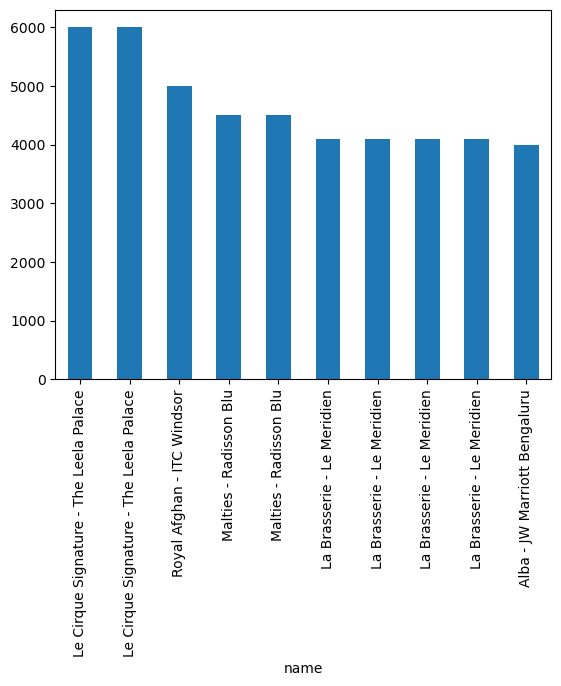

In [153]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

<AxesSubplot:xlabel='name'>

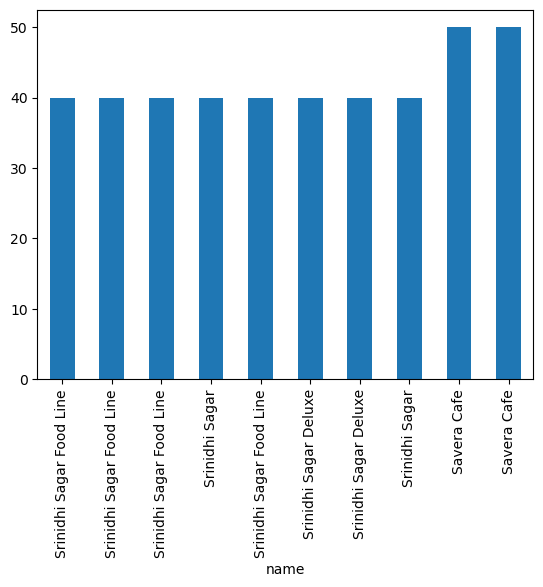

In [154]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [155]:
data[data['approx_cost(for two people)']<=500]

url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                                                               ...   
Venice Kerala Restaurant                            https://www.zomato.com/bangalore/venice-kerala...   
Thai & Chinese Fast Food                            https://www.zomato.com/bangalore/thai-chinese-...   
The Crunch                                          https://www.zomato.com/bangalore/the-crunch-br...   
Punjabi Charchay                                    https://www.zomato.com/bangalore/punjabi-charc...   
Raapchick                                           https://www.zomato.com/bangalore/raapchick-bro...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                                                               ...   
Venice Kerala Restaurant                            Opposite Brookfield Mall, Shiva Temple Road, B...   
Thai & Chinese Fast Food                            7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
The Crunch                                            33/1, Kundalahalli Road, Brookefield, Bangalore   
Punjabi Charchay                                    7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Raapchick                                           Opposite Brookefield Mall, Kundanhalli, Brooke...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                     No         No   
...                                                         ...        ...   
Venice Kerala Restaurant                                     No         No   
Thai & Chinese Fast Food                                     No         No   
The Crunch                                                   No         No   
Punjabi Charchay                                             No         No   
Raapchick                                                   Yes         No   

                                                    rate  votes  \
name                                                              
Addhuri Udupi Bhojana                                3.7     88   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   4.1    402   
The Coffee Shack                                     4.2    164   
Caf-Eleven      

In [157]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]

In [159]:
df_budget=df_budget.reset_index()
df_budget.head()

name  \
0                              Addhuri Udupi Bhojana   
1  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
2                                   The Coffee Shack   
3                                         Caf-Eleven   
4                                           T3H Cafe   

   approx_cost(for two people)  
0                          300  
1                          500  
2                          500  
3                          450  
4                          300

In [163]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape

(2436, 17)

In [164]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())

372

In [165]:
df_new=df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]
df_new.head()

url  \
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
34  https://www.zomato.com/bangalore/faasos-banash...   
51  https://www.zomato.com/bangalore/shree-cool-po...   
52  https://www.zomato.com/bangalore/corner-house-...   

                                              address  \
10  12,29 Near PES University Back Gate, D'Souza N...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51  1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   

                                                 name online_order book_table  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
12                                   The Coffee Shack          Yes        Yes   
34                                             Faasos          Yes         No   
51                                   Shree Cool Point          Yes         No   
52                             Corner House Ice Cream           No         No   

    rate  votes                           phone      location       rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari            Cafe   
12   4.2    164                  +91 9731644212  Banashankari            Cafe   
34   4.2    415                  +91 7700020020  Banashankari     Quick Bites   
51   4.1     28                  +91 9900617124   Vijay Nagar     Quick Bites   
52   4.3    345  080 26713965\r\n+91 9845444155  Banashankari  Dessert Parlor   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                NaN   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
34     North Indian, Biryani, Fast Food                          500   
51    Fast Food, Street Food, Beverages                          150   
52                  Ice Cream, Desserts                          400   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
51  [('Rated 5.0', 'RATED\n  Who would say no to s...   
52  [('Rated 3.0', "RATED\n  Always a fan of corne...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
51  ['Vegetable Sandwich', 'Vegetable Sandwich wit...        Delivery   
52                                                 []        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
34    Banashankari  
51    Banashankari  
52    Banashankari

In [166]:
location=[]
total=[]

for loc,loaction_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    

In [170]:
location_df=pd.DataFrame(zip(location,total))
location_df.head()

0   1
0                BTM  64
1       Banashankari  64
2          Banaswadi  64
3  Bannerghatta Road  64
4       Basavanagudi  64

In [171]:
location_df.columns=['location','restaurant']

In [172]:
location_df.head()

location  restaurant
0                BTM          64
1       Banashankari          64
2          Banaswadi          64
3  Bannerghatta Road          64
4       Basavanagudi          64

In [177]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400)&(df['location']==location)&(df['rate']>4)&(df['rest_type']==restaurant)]
    return (budget['name'].unique())

In [178]:
return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

D:\APPS-FILES\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='location'>

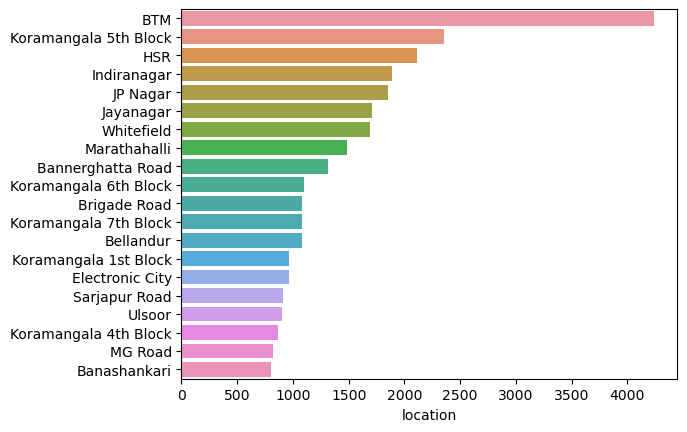

In [180]:
restaurant_location=df['location'].value_counts()[0:20]
sns.barplot(restaurant_location,restaurant_location.index)

In [182]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [183]:
!pip install geopy

     ------------------------------------ 119.8/119.8 kB 702.4 kB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00


In [184]:
from geopy.geocoders import Nominatim

In [185]:
geolocator=Nominatim(user_agent='app')

In [187]:
lat_lon=[]
for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [188]:
locations['geo_loc']=lat_lon

In [189]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.9467026, 77.5300705)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [191]:
locations.shape

(92, 2)

In [192]:
Rest_location=pd.DataFrame(df['location'].value_counts().reset_index())

In [193]:
Rest_location.head()

index  location
0                    BTM      4237
1  Koramangala 5th Block      2358
2                    HSR      2113
3            Indiranagar      1892
4               JP Nagar      1849

In [194]:
Rest_location.columns=['Name','count']
Rest_location.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [195]:
Restaurant_locations=Rest_location.merge(locations,on='Name',how='left').dropna()
Restaurant_locations.head()

Name  count                             geo_loc
0                    BTM   4237  (45.95485055, -112.49659530324134)
1  Koramangala 5th Block   2358            (12.9348429, 77.6189768)
2                    HSR   2113                (18.1475, 41.538889)
3            Indiranagar   1892            (12.9732913, 77.6404672)
4               JP Nagar   1849            (12.2655944, 76.6465404)

In [196]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.826475, 77.5865534), (12.9390255, 77.6238477),
       (12.9750849, 77.6079337), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9275886, 77.6308832),
       (12.848759900000001, 77.64825295827616), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5762419, -74.1265037),
       (34.0702921, 74.8090203), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7153533, -74.0076212),
       (13.0093455, 77.6377094), (13.0358947, 77.566958),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338, 77.5548

In [197]:
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [198]:
type(lat)

tuple

In [199]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [200]:
Restaurant_locations.head()

Name  count                             geo_loc  \
0                    BTM   4237  (45.95485055, -112.49659530324134)   
1  Koramangala 5th Block   2358            (12.9348429, 77.6189768)   
2                    HSR   2113                (18.1475, 41.538889)   
3            Indiranagar   1892            (12.9732913, 77.6404672)   
4               JP Nagar   1849            (12.2655944, 76.6465404)   

         lat         lon  
0  45.954851 -112.496595  
1  12.934843   77.618977  
2  18.147500   41.538889  
3  12.973291   77.640467  
4  12.265594   76.646540

In [201]:
Restaurant_locations.drop('geo_loc',axis=1,inplace=True)

In [202]:
Restaurant_locations.head()

Name  count        lat         lon
0                    BTM   4237  45.954851 -112.496595
1  Koramangala 5th Block   2358  12.934843   77.618977
2                    HSR   2113  18.147500   41.538889
3            Indiranagar   1892  12.973291   77.640467
4               JP Nagar   1849  12.265594   76.646540

In [204]:
!pip install folium

     ------------------------------------ 102.3/102.3 kB 736.3 kB/s eta 0:00:00


In [232]:
import folium
from folium.plugins import HeatMap

In [251]:
def generatebasemap(default_location=[12.97,77.59],default_zoom_start=12):
    basemap= folium.Map(location=default_location,zoom_start=default_zoom_start)
    return basemap

In [252]:
basemap=generatebasemap()

In [253]:
basemap

In [254]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [255]:
basemap

In [ ]:
d